In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum().sum()

866

In [8]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
filled = df.fillna({
    'Age': df['Age'].mean(),
    'Embarked': 'S' ,
    'Cabin': 'C85'

})

In [12]:
print(filled.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
older_than_30 = df[df['Age'] > 30]

In [16]:
print(older_than_30)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
4              5         0       3   
6              7         0       1   
11            12         1       1   
..           ...       ...     ...   
873          874         0       3   
879          880         1       1   
881          882         0       3   
885          886         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [52]:
average_age = df.groupby('Pclass')['Age'].mean().reset_index()

In [54]:
print(average_age)

   Pclass        Age
0       1  38.233441
1       2  29.877630
2       3  25.140620


In [56]:
sort_data = df.sort_values(by='Fare', ascending=False)

In [58]:
print(sort_data)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   
..           ...       ...     ...                                 ...   
633          634         0       1       Parr, Mr. William Henry Marsh   
413          414         0       2      Cunningham, Mr. Alfred Fleming   
822          823         0       1     Reuchlin, Jonkheer. John George   
732          733         0       2                Knight, Mr. Robert J   
674          675         0       2          Watson, Mr. Ennis Hastings   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

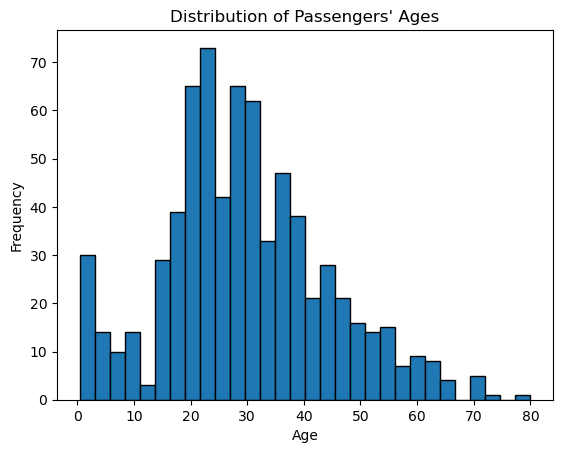

In [61]:
df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Passengers\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()




In [62]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: >

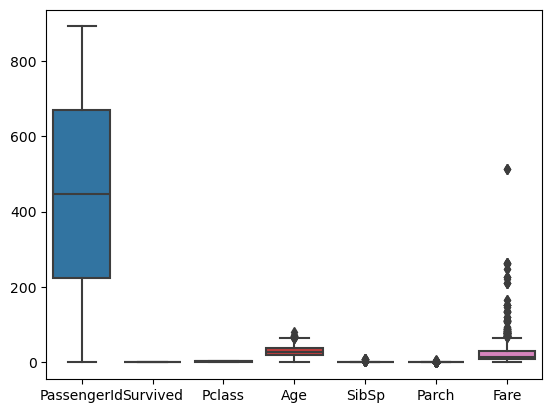

In [63]:
sns.boxplot(df)

C:\Users\Shiraji\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

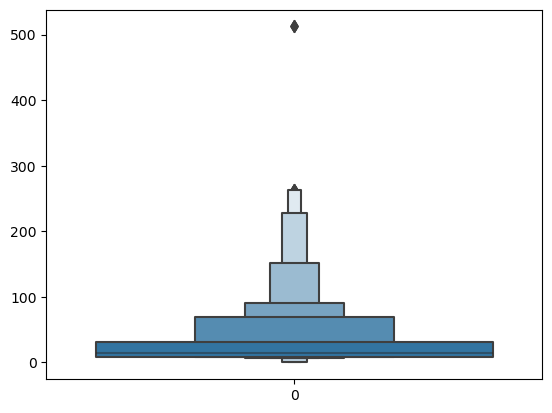

In [79]:
sns.boxenplot(df['Fare'])